In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
def show_image(matrix):
    plt.imshow(matrix)
    plt.show()

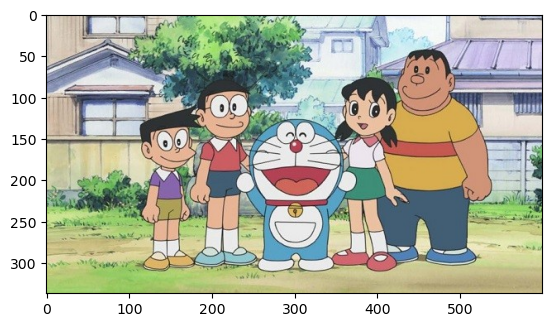

array([[221, 218, 209, ..., 138, 149, 171],
       [222, 219, 210, ..., 148, 159, 181],
       [221, 218, 209, ..., 147, 155, 176],
       ...,
       [159, 202, 110, ..., 197, 185, 137],
       [159, 202, 110, ..., 196, 184, 136],
       [156, 201, 106, ..., 196, 184, 136]], dtype=uint8)

In [4]:
import cv2
orig = cv2.imread('doraemon.jpg')
# Convert the image from BGR to RGB
rgb_image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
show_image(rgb_image)

A = rgb_image;
# Reshape A to a 2D matrix
A_2D = A.reshape((A.shape[0],-1))
A_2D


In [5]:
A.shape,A_2D.shape     #Converted 3D to 2D

((337, 600, 3), (337, 1800))

In [19]:
from sklearn.decomposition import PCA
def transform(percentage):
    tswizzle_pca = PCA(n_components=percentage).fit(A_2D)
    transformed = tswizzle_pca.transform(A_2D)
    projected = tswizzle_pca.inverse_transform(transformed)
    return projected

In [49]:
def compress(percentage):
    percentToUse = 100-percentage
    TotalNumOfComp = int(min(A.shape[0],A.shape[1]))
    numOfCompToUse = int((percentToUse * TotalNumOfComp)/100)
    final = transform(numOfCompToUse)
    final.shape
    final = final.reshape((final.shape[0],int(final.shape[1]/3),3))
    final = final/255
    show_image(final)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


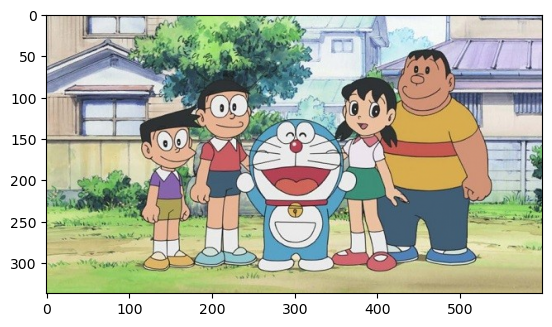

In [51]:
compress(0)